In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# 1. Data Collection

In [48]:
now = datetime.now()

start = datetime(now.year-10,now.month,now.day) #last 10 year date
end = now
ticker = 'AAPL' #this the stock symbol of apple stock
df = yf.download(ticker, start, end)
df

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-20,28.496607,28.612736,27.953921,28.043252,188217200
2015-04-21,28.342524,28.630615,28.288924,28.608284,129740400
2015-04-22,28.724401,28.780233,28.210749,28.360378,150618000
2015-04-23,28.958893,29.126389,28.617202,28.652935,183083600
2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600
...,...,...,...,...,...
2025-04-11,198.149994,199.539993,186.059998,186.100006,87435900
2025-04-14,202.520004,212.940002,201.160004,211.440002,101352900


In [49]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-04-11,198.149994,199.539993,186.059998,186.100006,87435900
2025-04-14,202.520004,212.940002,201.160004,211.440002,101352900
2025-04-15,202.139999,203.509995,199.800003,201.860001,51343900
2025-04-16,194.270004,200.699997,192.369995,198.360001,59732400
2025-04-17,196.979996,198.830002,194.419998,197.199997,51334300


# 2. Data Exploration and Visualisation 

In [50]:
df

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-04-20,28.496607,28.612736,27.953921,28.043252,188217200
2015-04-21,28.342524,28.630615,28.288924,28.608284,129740400
2015-04-22,28.724401,28.780233,28.210749,28.360378,150618000
2015-04-23,28.958893,29.126389,28.617202,28.652935,183083600
2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600
...,...,...,...,...,...
2025-04-11,198.149994,199.539993,186.059998,186.100006,87435900
2025-04-14,202.520004,212.940002,201.160004,211.440002,101352900


In [51]:
type(df)

pandas.core.frame.DataFrame

In [52]:
df.shape

(2516, 5)

In [53]:
#check nan value in data (df)
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [54]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,99.938515,100.941927,98.828722,99.842317,1.124729e+08
std,68.248241,68.920878,67.486927,68.168852,6.554268e+07
min,20.674536,20.978906,20.475435,20.596722,2.323470e+07
25%,37.056063,37.464148,36.656912,37.100718,6.884192e+07
50%,76.481052,77.159007,75.568064,76.291418,9.650920e+07
75%,158.697678,160.744514,156.422887,158.388856,1.371295e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [55]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [56]:
df = df.reset_index()

In [57]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-04-20,28.496607,28.612736,27.953921,28.043252,188217200
1,2015-04-21,28.342524,28.630615,28.288924,28.608284,129740400
2,2015-04-22,28.724401,28.780233,28.210749,28.360378,150618000
3,2015-04-23,28.958893,29.126389,28.617202,28.652935,183083600
4,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600


Text(0, 0.5, 'Close Price')

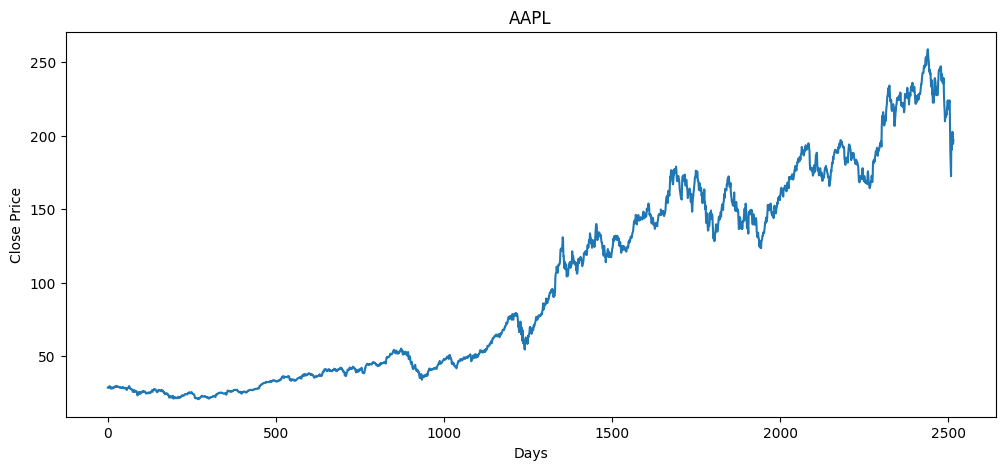

In [58]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3.Feature Engineering 

## 100 Days Moving Average 

In [59]:
df['MA_100'] = df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-20,28.496607,28.612736,27.953921,28.043252,188217200,NaN
1,2015-04-21,28.342524,28.630615,28.288924,28.608284,129740400,NaN
2,2015-04-22,28.724401,28.780233,28.210749,28.360378,150618000,NaN
3,2015-04-23,28.958893,29.126389,28.617202,28.652935,183083600,NaN
4,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600,NaN


In [60]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-04-20,28.496607,28.612736,27.953921,28.043252,188217200,NaN
1,2015-04-21,28.342524,28.630615,28.288924,28.608284,129740400,NaN
2,2015-04-22,28.724401,28.780233,28.210749,28.360378,150618000,NaN
3,2015-04-23,28.958893,29.126389,28.617202,28.652935,183083600,NaN
4,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600,NaN
...,...,...,...,...,...,...,...
98,2015-09-08,25.300711,25.357030,24.852413,25.174557,219374400,NaN
99,2015-09-09,24.814114,25.685929,24.728508,25.627359,340043200,27.703236
100,2015-09-10,25.359280,25.519225,24.757794,24.841145,251571200,27.671863


Text(0, 0.5, 'Price')

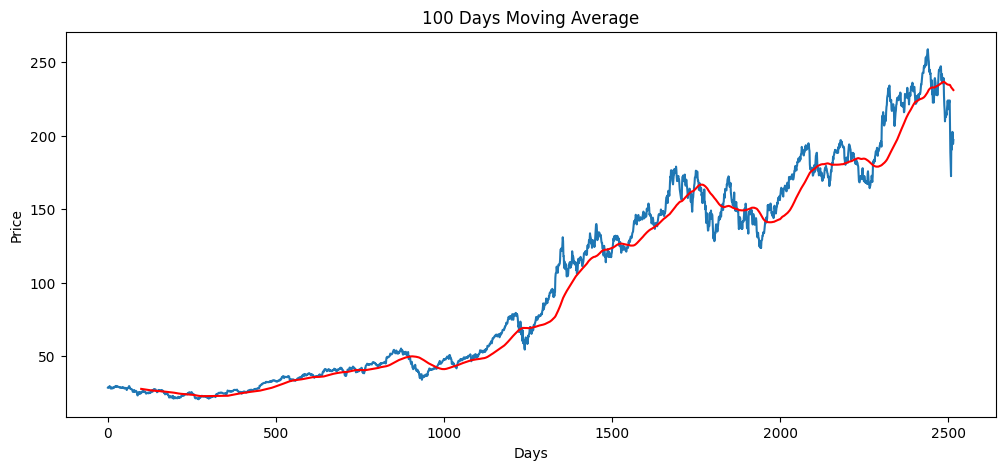

In [61]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.title('100 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

## 200 Days Moving Average 

In [62]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-04-20,28.496607,28.612736,27.953921,28.043252,188217200,NaN,NaN
1,2015-04-21,28.342524,28.630615,28.288924,28.608284,129740400,NaN,NaN
2,2015-04-22,28.724401,28.780233,28.210749,28.360378,150618000,NaN,NaN
3,2015-04-23,28.958893,29.126389,28.617202,28.652935,183083600,NaN,NaN
4,2015-04-24,29.095135,29.173301,28.860640,29.142035,178103600,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-02-01,21.816315,21.879662,21.583288,21.825365,163774000,25.064099,NaN
199,2016-02-02,21.375149,21.728083,21.329900,21.587813,149428800,25.029710,26.366473
200,2016-02-03,21.798216,21.909073,21.284652,21.492792,183857200,24.994099,26.332981


Text(0, 0.5, 'Price')

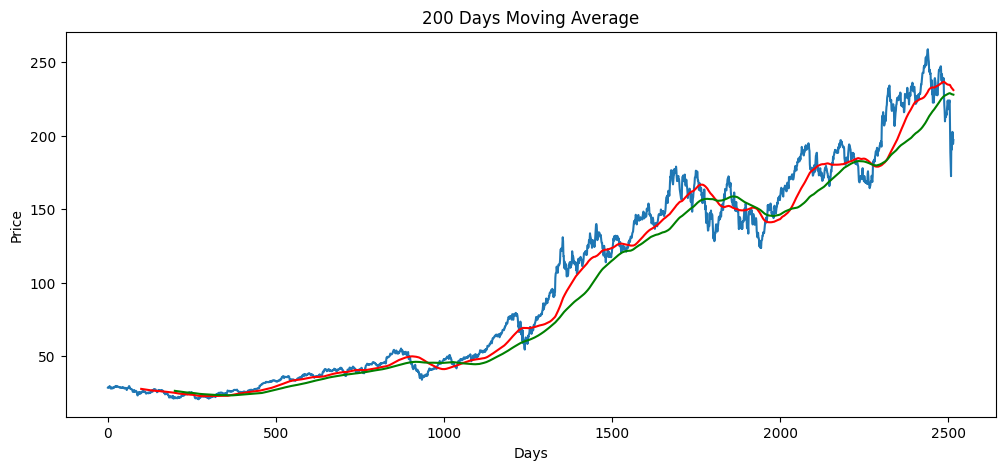

In [63]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], 'r')
plt.plot(df['MA_200'], 'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

## Calculating % changed in each trading session

In [64]:
df['Percentage Changed'] = df.Close.pct_change()
df[['Close', 'Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,28.496607,NaN
1,28.342524,-0.005407
2,28.724401,0.013474
3,28.958893,0.008163
4,29.095135,0.004705
...,...,...
2511,198.149994,0.040594
2512,202.520004,0.022054
2513,202.139999,-0.001876


In [65]:
df['Close'].dtypes


Ticker
AAPL    float64
dtype: object

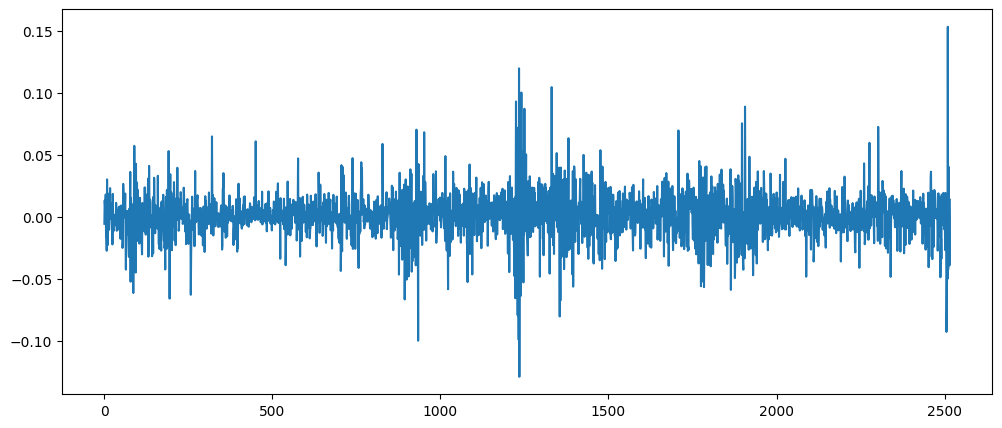

In [66]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

# 4. Data Preprocessing 

In [67]:
df.shape

(2516, 9)

### spliting data into Training & Testing datasets

In [68]:
data_training = pd.DataFrame(df.Close[0:int(len(df)*0.7)]) #70% data

data_testing = pd.DataFrame(df.Close[int(len(df)*0.7) : len(df)]) #30% data

In [69]:
data_training

Ticker,AAPL
0,28.496607
1,28.342524
2,28.724401
3,28.958893
4,29.095135
...,...
1756,169.395187
1757,167.377869
1758,163.107101
1759,164.986633


In [70]:
data_testing

Ticker,AAPL
1761,162.654404
1762,162.437943
1763,164.730774
1764,164.563477
1765,163.766403
...,...
2511,198.149994
2512,202.520004
2513,202.139999
2514,194.270004


### Scaling down the data between 0 and 1

In [71]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [72]:
data_training_array = scaler.fit_transform(data_training)

In [73]:
data_training_array

array([[0.04944251],
       [0.04846856],
       [0.05088237],
       ...,
       [0.90030158],
       [0.91218191],
       [0.92922497]])

In [74]:
data_training_array.shape

(1761, 1)

# 5. Sequence Creation

In [75]:
x_train = []
y_train = []

# taking 100 days step wise data
for i in range(100,data_training_array.shape[0]): 
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i,0])

x_train = np.array(x_train)
y_train = np.array(y_train)

In [76]:
x_train.shape
y_train.shape


(1661,)

# 6. Model Building

In [77]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [78]:
model = Sequential()

# Input layer:
# The model expects sequences of 100 days, each with 1 feature ('Close' price).
# So, the input shape is (100 time steps, 1 feature per step).
model.add(Input(shape=(100, 1)))

# First LSTM layer:
# This layer has 128 units (or memory cells) and uses the 'tanh' activation function.
# It returns the full sequence of outputs (one for each time step) to the next LSTM layer.
# It helps the model learn patterns over time in the past 100 days of closing prices.
model.add(LSTM(units=128, activation='tanh', return_sequences=True)) 

# Second LSTM layer:
# This layer has 64 units and only returns the final output of the sequence,
# summarizing all the learned information into a single output vector.
model.add(LSTM(units=64))

# Dense (fully connected) layer with 25 neurons:
# This layer tries to learn complex combinations from the LSTM output.
# It's like a mini hidden layer to prepare for the final prediction.
model.add(Dense(25))

# Output layer:
# This final layer has 1 neuron, which gives the predicted price for the next day.
model.add(Dense(1))


# 7. Model Training

In [79]:
# Compile the model:
# 'adam' is an optimizer that helps the model learn more efficiently.
# 'mean_squared_error' is the loss function — it measures how far the model's predictions are from the actual values.
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model:
# The model will look at the training data (x_train and y_train)
# and try to learn the pattern by adjusting its internal weights.
# This training process will repeat 50 times (epochs) to improve accuracy.
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0345
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - loss: 3.8939e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.4212e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.8569e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step - loss: 3.9007e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.1319e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 5.3452e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 4.9010e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 4.3366e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.6420e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 2.9942e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.8615e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - loss: 3.6453e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - loss: 3.8707e-04
Epoch 15/50
52/52 ━

In [80]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [81]:
# Save the trained model
model.save('stock_prediction_model.keras')

# 8. Preparing Test Data

In [82]:
data_testing

Ticker,AAPL
1761,162.654404
1762,162.437943
1763,164.730774
1764,164.563477
1765,163.766403
...,...
2511,198.149994
2512,202.520004
2513,202.139999
2514,194.270004


In [83]:
data_training

Ticker,AAPL
0,28.496607
1,28.342524
2,28.724401
3,28.958893
4,29.095135
...,...
1756,169.395187
1757,167.377869
1758,163.107101
1759,164.986633


In [84]:
past_100_days = data_training.tail(100)

In [85]:
past_100_days

Ticker,AAPL
1661,157.788971
1662,158.250870
1663,158.634186
1664,159.155060
1665,154.113266
...,...
1756,169.395187
1757,167.377869
1758,163.107101
1759,164.986633


In [86]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [87]:
final_df

Ticker,AAPL
0,157.788971
1,158.250870
2,158.634186
3,159.155060
4,154.113266
...,...
850,198.149994
851,202.520004
852,202.139999
853,194.270004


In [93]:
# scaling down the data between 0 to 1
input_data = scaler.fit_transform(final_df)
# input_data

In [124]:
# create sequence 
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

In [126]:
x_test


0.28909074764304477

# 9. Making Predictions

In [127]:
y_predicted = model.predict(x_test)

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [136]:
# y_predicted

In [129]:
# reverse to back original value from 0 to 1
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1,1)).flatten()

In [132]:
y_predicted

array([167.39314, 166.20197, 164.91953, 165.23329, 165.66017, 165.52765,
       163.15869, 161.83492, 158.6143 , 156.3423 , 158.33255, 157.95801,
       157.3652 , 157.60112, 160.79037, 159.23782, 157.51685, 154.20442,
       152.95705, 149.47961, 145.46223, 144.62645, 144.35179, 145.77382,
       143.99188, 140.77191, 138.39862, 138.96436, 139.2229 , 139.37123,
       140.5834 , 143.83449, 146.23843, 147.40498, 148.68562, 147.13007,
       145.69594, 145.82802, 146.07135, 144.26971, 140.6574 , 136.18059,
       133.4107 , 132.88919, 131.51215, 130.80406, 131.87146, 133.01872,
       134.77567, 137.2993 , 139.19958, 138.69328, 138.21762, 137.00276,
       136.75752, 137.80933, 139.40335, 141.88644, 144.03325, 144.46088,
       144.58101, 144.39642, 145.32297, 146.8765 , 146.81622, 147.88441,
       149.65831, 151.88489, 152.82054, 152.53221, 151.45532, 152.74571,
       154.37509, 157.6807 , 159.61734, 159.67628, 161.92722, 163.5443 ,
       164.15918, 164.00038, 163.73875, 165.60101, 

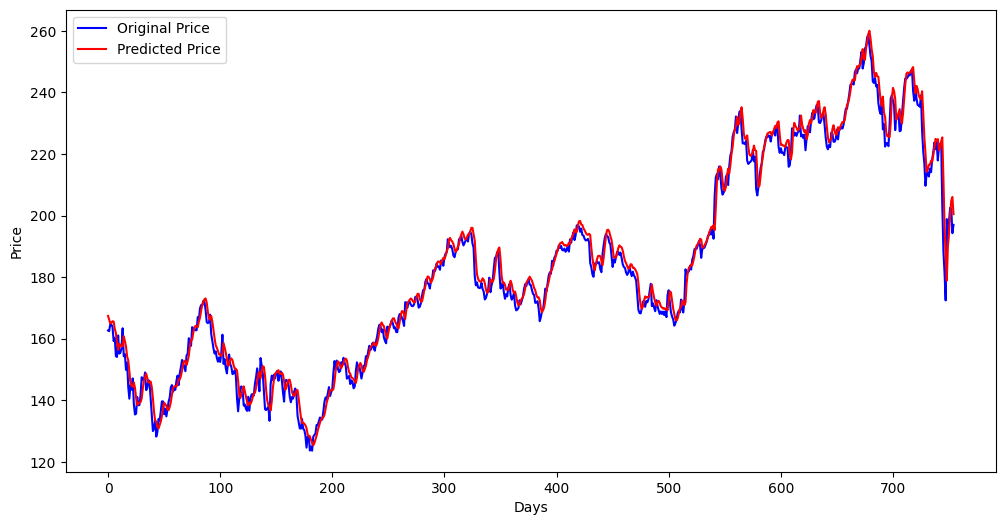

In [133]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

(140.0, 220.0)

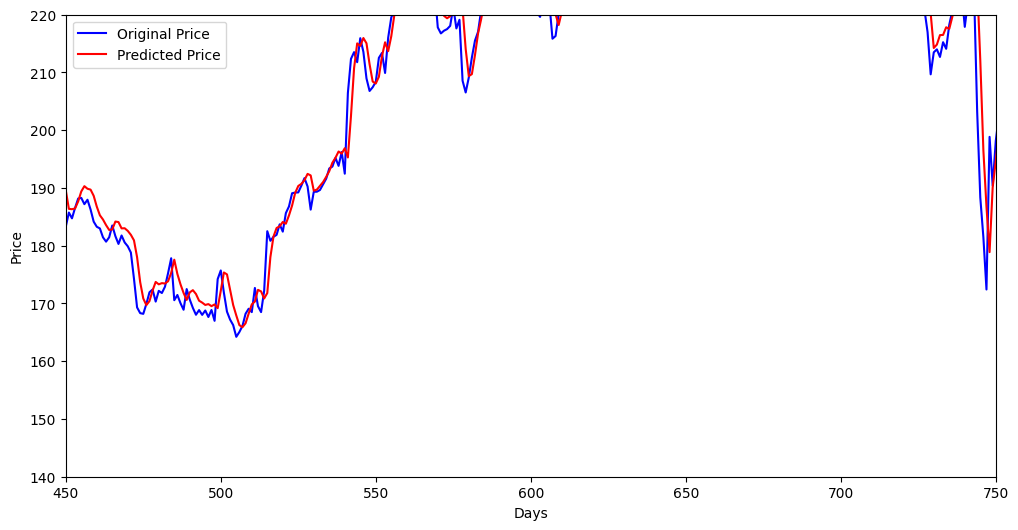

In [135]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
# zoom some part of graph to check offset
plt.xlim(450,750)
plt.ylim(140,220)

# 10. Model Evaluation

In [143]:
from sklearn.metrics import mean_squared_error, r2_score

In [144]:
# Mean Squared Error (MSE)
# This measures the average of the squares of the prediction errors.
# In simple terms, it shows how far off the model's predictions are from the actual values.
# A lower MSE means better performance.
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")


Mean Squared Error (MSE): 15.372621769723578


In [145]:
# Root Mean Squared Error (RMSE):
# This is the square root of the Mean Squared Error (MSE).
# It gives the error in the same unit as the original data (e.g., price), making it easier to understand.
# Like MSE, a lower RMSE means better model accuracy.
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 3.920793512762892


In [142]:
# R-Squared Score:
# This metric shows how well the model's predictions match the actual values.
# The score ranges from 0 to 1 — the closer it is to 1, the better the model is at predicting accurately.
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")


R-Squared: 0.9858023962098093
